<a href="https://colab.research.google.com/github/saadz-khan/StyleGAN-client/blob/master/StyleGAN-ada%20interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training StyleGAN2 on Colab

Use Colab Pro+ ($49.99/month), Colab Pro ($10.00/month) to get a couple extra hours of training time in per session and do not run into low-RAM issues.

Recommended: Colab Pro ($10.00 per month)

## Setting up only once. Kindly check the option
<center>  

![image](https://media.giphy.com/media/IFRhbMJSy3IaNZulCk/source.gif?cid=790b76116b562dd18158c804953ae06343645e756f8ed52d&rid=source.gif&ct=g)


## Custom Training StyleGan2-ADA

StyleGAN2-ADA only work with Tensorflow 1. Run the next cell before anything else to make sure we’re using TF1 and not TF2.

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!nvidia-smi

Tue Dec 21 07:07:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Install Repo to Google Drive

Colab is a little funky with training. I’ve found the best way to do this is to install the repo directly into your Google Drive folder.

First, mount your Drive to the Colab notebook: |

## Mounting Google Drive
So I’m actually gonna install my entire repo directly into your Google Drive. This will make the setup a little easier.

First, connect your Drive to Colab. Gif explains how to:

<p align="center">
  <img src="https://media.giphy.com/media/WKMU25D95cjqWw9GCS/source.gif?cid=790b7611b611ba7d6a09693279bea7a3e08cb1e976b1b827&rid=source.gif&ct=g" alt="animated-gif2" />
</p>  

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installing and Updating the Repo
Next, run this cell. If you’re already installed the repo,  
It will skip the installation process and change into the repo’s directory. If you haven’t installed it, it will install all the files necessary.

In [4]:
import os
if os.path.isdir("/content/drive/My Drive/colab-sg2-ada"):
    %cd "/content/drive/My Drive/colab-sg2-ada/stylegan2-ada"
else:
    #install script
    %cd "/content/drive/My Drive/"
    !mkdir colab-sg2-ada
    %cd colab-sg2-ada
    !git clone https://github.com/dvschultz/stylegan2-ada
    %cd stylegan2-ada
    !mkdir downloads
    !mkdir datasets

/content/drive/My Drive/colab-sg2-ada/stylegan2-ada


In [5]:
%cd "/content/drive/My Drive/colab-sg2-ada/stylegan2-ada"
!git config --global user.name "test"
!git config --global user.email "test@test.com"
!git fetch origin
!git checkout origin/main -- train.py

/content/drive/My Drive/colab-sg2-ada/stylegan2-ada


# Dataset Requirements

The following are the dataset requirements

- All the images in the dataset folder must be RGB (bitdepth = 24) or grayscale (bitdepth=8) 
- All the images must have the same resolution and squared.
**Resolution Requirements:**
- Images must be squared for this repository (For easy bulk resizing I would recommend this website [Click Link](https://bulkresizephotos.com/) 
You can add photos in bulk and it is super easy to resize it. It takes time though about 30 minutes for about a 1000 images resizing

## Some Custom Dataset 
If you would like to experiment. These are all art based you can check it out and Enjoy working with it

In [ ]:
#@title Choose Your Dataset

Dataset = 'Ukiyo_e' #@param ["Abstract_Expressionism", "Art_Nouveau_Modern", "Baroque", "Color_Field_Painting", "Cubism", "Expressionism", "Fauvism", "High_Renaissance", "Impressionism", "Mannerism_Late_Renaissance", "Minimalism", "Naive_Art_Primitivism", "Northern_Renaissance", "pop_art", "Post_Impressionism", "Realism", "Rococo", "Romanticism", "Symbolism", "Ukiyo_e"]
%cd "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets"

if Dataset is 'Minimalism':
  !wget https://archive.org/download/StyleGANDatasets/Minimalism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Minimalism.zip' 
  dataset_path= "./Minimalism"

if Dataset is "Cubism":
  !wget https://archive.org/download/StyleGANDatasets/Cubism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Cubism.zip' 
  dataset_path= "./Cubism" 

if Dataset is "Abstract_Expressionism":
  !wget https://archive.org/download/StyleGANDatasets/Abstract_Expressionism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Abstract_Expressionism.zip' 
  dataset_path= "./Abstract_Expressionism"

if Dataset is "Color_Field_Painting":
  !wget https://archive.org/download/StyleGANDatasets/Color_Field_Painting.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Color_Field_Painting.zip' 
  dataset_path= "./Color_Field_Painting"
 
if Dataset is "Fauvism":
  !wget https://archive.org/download/StyleGANDatasets/Fauvism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Fauvism.zip' 
  dataset_path= "./Fauvism"

if Dataset is "High_Renaissance":
  !wget https://archive.org/download/StyleGANDatasets/High_Renaissance.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/High_Renaissance.zip' 
  dataset_path= "./High_Renaissance"

if Dataset is "Mannerism_Late_Renaissance": 
  !wget https://archive.org/download/StyleGANDatasets/Mannerism_Late_Renaissance.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Mannerism_Late_Renaissance.zip' 
  dataset_path= "./Mannerism_Late_Renaissance"

if Dataset is "Rococo":
  !wget https://archive.org/download/StyleGANDatasets/Rococo.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Rococo.zip' 
  dataset_path= "./Rococo" 

if Dataset is "Ukiyo_e":
  !wget https://archive.org/download/StyleGANDatasets/Ukiyo_e.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Ukiyo_e.zip' 
  dataset_path= "./Ukiyo_e"

if Dataset is "pop_art":
  !wget https://archive.org/download/StyleGANDatasets/pop_art.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/pop_art.zip' 
  dataset_path= "./pop_art"

if Dataset is "Art_Nouveau_Modern":
  !wget https://archive.org/download/Art_Nouveau_Modern/Art_Nouveau_Modern.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Art_Nouveau_Modern.zip' 
  dataset_path= "./Art_Nouveau_Modern"

if Dataset is "baroque":
  !wget https://archive.org/download/BaroqueDataset/baroque.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/baroque.zip' 
  dataset_path= "./baroque"

if Dataset is "Expressionism":
  !wget https://archive.org/download/expressionism/expressionism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/expressionism.zip' 
  dataset_path= "./expressionism"

if Dataset is "Naive_Art_Primitivism":
  !wget https://archive.org/download/Naive_Art_Primitivism/Naive_Art_Primitivism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Naive_Art_Primitivism.zip' 
  dataset_path= "./Naive_Art_Primitivism"

if Dataset is "Impressionism":
  !wget https://archive.org/download/ImpressionismArt/Impressionism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Impressionism.zip' 
  dataset_path= "./Impressionism" 

if Dataset is "Northern_Renaissance":
  !wget https://archive.org/download/Northern_Renaissance/Northern_Renaissance.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Northern_Renaissance.zip' 
  dataset_path= "./Northern_Renaissance"

if Dataset is "Post_Impressionism":
  !wget https://archive.org/download/Post_Impressionism/Post_Impressionism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Post_Impressionism.zip' 
  dataset_path= "./Post_Impressionism"

if Dataset is "Realism":
  !wget https://archive.org/download/RealismData/Realism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Realism.zip' 
  dataset_path= "./Realism"  

if Dataset is "Romanticism":
  !wget https://archive.org/download/RomanticismData/Romanticism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Romanticism.zip'    
  dataset_path= "./Romanticism" 

if Dataset is "Symbolism":
  !wget https://archive.org/download/SymbolismData/Symbolism.zip -q --show-progress
  !unzip '/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Symbolism.zip'    
  dataset_path= "./Symbolism"
%cd ..

/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets
Ukiyo_e.zip           0%[                    ]   7.49M   398KB/s    eta 92m 41s^C
unzip:  cannot find or open /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Ukiyo_e.zip, /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Ukiyo_e.zip.zip or /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada-pytorch/datasets/Ukiyo_e.zip.ZIP.
/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada


## Adding the dataset (Do not run) For testing

In [ ]:
!pip install kaggle-cli
!pip install kaggle

In [ ]:
%cd /content/drive/My\ Drive/
!mkdir ./data
!mkdir ./data/robgon-abstract/
!mkdir ./data/landscapes/

/content/drive/My Drive
mkdir: cannot create directory ‘./data’: File exists
mkdir: cannot create directory ‘./data/robgon-abstract/’: File exists


In [ ]:
!pip install kaggle -q      # At first, I suspect the kaggle API lose effect so it doesn't have .kaggle folder. (not working)
!rm -rf /root/.kaggle.      # when I created the folder, it says the file or dir already exits
!mkdir /root/.kaggle        # successful
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/kaggle.json    # not sure if I have to use full destination path, I previously only used /root/.kaggle and it failed. Don't have time to validate this thought.
!ls /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


In [ ]:
%cd /content/drive/MyDrive/
#!kaggle datasets download -d robgonsalves/abstract-paintings -p Dataset/abstract-art
!kaggle datasets download -d arnaud58/landscape-pictures -p Dataset/landscape

/content/drive/MyDrive
 98% 609M/620M [00:17<00:00, 52.8MB/s]
100% 620M/620M [00:17<00:00, 38.1MB/s]


In [ ]:
#!mkdir /content/drive/MyDrive/Dataset/robgon-abstract
!unzip /content/drive/MyDrive/Dataset/abstract-art/abstract-paintings.zip drive/MyDrive/Dataset/abstract-art
!rm -rf /content/drive/MyDrive/Dataset/abstract-art/abstract-paintings.zip

!unzip /content/drive/MyDrive/Dataset/landscape/landscape-pictures.zip drive/MyDrive/Dataset/landscape
!rm -rf /content/drive/MyDrive/Dataset/landscape/landscape-pictures.zip


In [ ]:
# Landscape dataset Preprocessing Images to 1024x1024
%cd /content/drive/MyDrive/Dataset/landscape_final
!unzip /content/drive/MyDrive/Dataset/landscape-resized/landscape-1.zip
!unzip /content/drive/MyDrive/Dataset/landscape-resized/landscape-2.zip
!unzip /content/drive/MyDrive/Dataset/landscape-resized/landscape-3.zip

In [ ]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl

--2021-10-27 21:52:09--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 99.86.38.107, 99.86.38.69, 99.86.38.33, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|99.86.38.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381646055 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.97M  30.0MB/s    in 15s     

2021-10-27 21:52:25 (23.8 MB/s) - ‘ffhq.pkl’ saved [381646055/381646055]



## Convert dataset to .tfrecords (Must Step) 
Model would not work Output should be as in the image down below
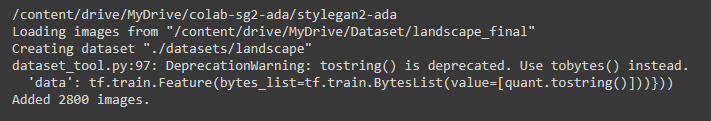

**Note: You only need to do this once per dataset. If you have already run this and are returning to conntinue training, skip these cells.**

Next we need to convert our image dataset to a format that StyleGAN2-ADA can read from. There are two options here. You can upload your dataset directly to Colab (as a zipped file), or you can upload it to Drive directly and read it from there.

Now that your image dataset is uploaded, we need to convert it to the `.tfrecords` format.

Depending on the resolution of your images and how many you have, this can take a while.

In [ ]:
%cd /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada
#update this to the path to your image folder
dataset_path = "path_of_dataset"
#give your dataset a name
dataset_name = "name"
!rm /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/dataset/*
#you don't need to edit anything here
!python dataset_tool.py create_from_images ./datasets/{dataset_name} {dataset_path}

/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada
Loading images from "/content/drive/MyDrive/Dataset/landscape_final"
Creating dataset "./datasets/landscape"
dataset_tool.py:97: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
Added 2800 images.


## Train a custom model

We’re ready to start training! There are numerous arguments to training, what’s listed below are the most popular options. To see all the options, run the following cell.


In [ ]:
# Use them only for metrics and help with the arguments
# This is just some help arguments
!python train.py --help

usage: train.py [-h] --outdir DIR [--gpus INT] [--snap INT] [--seed INT] [-n]
                --data PATH [--res INT] [--mirror BOOL] [--mirrory BOOL]
                [--use-raw BOOL] [--metrics LIST] [--metricdata PATH]
                [--cfg {auto,11gb-gpu,11gb-gpu-complex,24gb-gpu,24gb-gpu-complex,48gb-gpu,48gb-2gpu,stylegan2,paper256,paper512,paper1024,cifar,cifarbaseline,aydao}]
                [--lrate FLOAT] [--ttur BOOL] [--gamma FLOAT] [--nkimg INT]
                [--kimg INT] [--topk FLOAT] [--aug {noaug,ada,fixed,adarv}]
                [--p FLOAT] [--target TARGET] [--initstrength INITSTRENGTH]
                [--augpipe {blit,geom,color,filter,noise,cutout,bg,bgc,bgcf,bgcfn,bgcfnc}]
                [--cmethod {nocmethod,bcr,zcr,pagan,wgangp,auxrot,spectralnorm,shallowmap,adropout}]
                [--dcap FLOAT] [--resume RESUME] [--freezed INT]

Train a GAN using the techniques described in the paper
"Training Generative Adversarial Networks with Limited Data".

optional

## Arguments are down below

The name of the output directory (e.g., `00000-custom-auto1`) reflects the hyperparameter configuration that was used. In this case, `custom` indicates the training set (`--data`) and `auto1` indicates the *base configuration* that was used to select the hyperparameters (`--cfg`):

| Base config      | Description
| :----------      | :----------
| `auto` (default) | Automatically select reasonable defaults based on resolution and GPU count. Serves as a good starting point for new datasets, but does not necessarily lead to optimal results.
| `stylegan2`      | Reproduce results for StyleGAN2 config F at 1024x1024 using 1, 2, 4, or 8 GPUs.
| `paper256`       | Reproduce results for FFHQ and LSUN Cat at 256x256 using 1, 2, 4, or 8 GPUs.
| `paper512`       | Reproduce results for BreCaHAD and AFHQ at 512x512 using 1, 2, 4, or 8 GPUs.
| `paper1024`      | Reproduce results for MetFaces at 1024x1024 using 1, 2, 4, or 8 GPUs.
| `cifar`          | Reproduce results for CIFAR-10 (tuned configuration) using 1 or 2 GPUs.
| `cifarbaseline`  | Reproduce results for CIFAR-10 (baseline configuration) using 1 or 2 GPUs.

The training configuration can be further customized with additional arguments. Common examples:

* `--aug=noaug` disables ADA (default: enabled).
* `--mirror=1` amplifies the dataset with x-flips. Often beneficial, even with ADA.
* `--resume=ffhq1024 --snap=10` performs transfer learning from FFHQ trained at 1024x1024.
* `--resume=~/training-runs/<RUN_NAME>/network-snapshot-<KIMG>.pkl` resumes where a previous training run left off.
* `--gamma=10` overrides R1 gamma. We strongly recommend trying out at least a few different values for each new dataset.

Augmentation fine-tuning:

* `--aug=ada --target=0.7` adjusts ADA target value (default: 0.6).
* `--aug=adarv` selects the alternative ADA heuristic (requires a separate validation set).
* `--augpipe=blit` limits the augmentation pipeline to pixel blitting only.
* `--augpipe=bgcfnc` enables all available augmentations (blit, geom, color, filter, noise, cutout).
* `--cmethod=bcr` enables bCR with small integer translations.

In [ ]:
dataset_name = "" #@param[]{allow-input: true}
#how often should the model generate samples and a .pkl file
snapshot_count = 4 #@param {type: "number"}
#should the images be mirrored left to right?
mirrored_X = 0 #@param {type: "slider", min: 0, max: 1}
#should the images be mirrored top to bottom?
mirrored_Y = 0 #@param {type: "slider", min: 0, max: 1}

#metrics? 
metric_list = None
#augments

aug = 'ada'

# target min: 0.5, max: 1.0
target = 0.6 #@param {type: "number"}
augpipe= 'bgcnfnc'  #@param ["blit", "bgcnfnc", "bgc"]
#
# this is the most important cell to update
#
# Change this after each training session
resume_from_path = "Latest_pkl_file_in_results_folder" #@param[]{allow-input: true}

#don't edit this unless you know what you're doing :)
!python train.py --outdir ./results --snap={snapshot_count} --aug={aug} --target={target} --cfg=11gb-gpu --gpus=1 --augpipe={augpipe} --data=./datasets/{dataset_name}  --mirror={mirrored_X} --mirrory={mirrored_Y} --metrics={metric_list} --resume={resume_from_path}

In [ ]:
#this name must EXACTLY match the dataset name you used when creating the .tfrecords file
dataset_name = "dima-art"
#how often should the model generate samples and a .pkl file
snapshot_count = 4
#should the images be mirrored left to right?
mirrored = True
#should the images be mirrored top to bottom?
mirroredY = False
#metrics? 
metric_list = None
#augments
augs = "bg"

#
# this is the most important cell to update
#
# running it for the first time? set it to ffhq(+resolution)
# resuming? get the path to your latest .pkl file and use that
resume_from = "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/results/00008-dima-art-mirror-11gb-gpu-bg-resumecustom/network-snapshot-000016.pkl" # Change this after each training session

#don't edit this unless you know what you're doing :)
!python train.py --outdir ./results --snap={snapshot_count} --cfg=11gb-gpu --data=./datasets/{dataset_name} --augpipe={augs} --mirror={mirrored} --mirrory={mirroredY} --metrics={metric_list} --resume={resume_from} --augpipe="bg"

tcmalloc: large alloc 4294967296 bytes == 0x55d4f19b0000 @  0x7fae4213e001 0x7fae3f34154f 0x7fae3f391b58 0x7fae3f395b17 0x7fae3f434203 0x55d4e8f3c544 0x55d4e8f3c240 0x55d4e8fb0627 0x55d4e8faaced 0x55d4e8f3e48c 0x55d4e8f7f159 0x55d4e8f7c0a4 0x55d4e8f3cd49 0x55d4e8fb094f 0x55d4e8faa9ee 0x55d4e8e7ce2b 0x55d4e8facfe4 0x55d4e8faa9ee 0x55d4e8e7ce2b 0x55d4e8facfe4 0x55d4e8faaced 0x55d4e8e7ce2b 0x55d4e8facfe4 0x55d4e8f3dafa 0x55d4e8fab915 0x55d4e8faa9ee 0x55d4e8faa6f3 0x55d4e90744c2 0x55d4e907483d 0x55d4e90746e6 0x55d4e904c163
tcmalloc: large alloc 4294967296 bytes == 0x55d5f19b0000 @  0x7fae4213c1e7 0x7fae3f34146e 0x7fae3f391c7b 0x7fae3f39235f 0x7fae3f434103 0x55d4e8f3c544 0x55d4e8f3c240 0x55d4e8fb0627 0x55d4e8faa9ee 0x55d4e8f3dbda 0x55d4e8fac737 0x55d4e8faa9ee 0x55d4e8f3dbda 0x55d4e8fac737 0x55d4e8faa9ee 0x55d4e8f3dbda 0x55d4e8fac737 0x55d4e8f3dafa 0x55d4e8fab915 0x55d4e8faa9ee 0x55d4e8f3dbda 0x55d4e8fafd00 0x55d4e8faa9ee 0x55d4e8f3dbda 0x55d4e8fac737 0x55d4e8faaced 0x55d4e8f3e48c 0x55d4e8f7

### While it’s training...
**Once the above cell is running you should be training!**

Don’t close this tab! Colab needs to be open and running in order to continue training. Every ~15min or so a new line should get added to your output, indicated its still training. Depending on you `snapshot_count` setting you should see the results folder in your Google drive folder fill with both samples (`fakesXXXXXx.jpg`) and model weights (`network-snapshot-XXXXXX.pkl`). The samples are worth looking at while it trains but don’t get too worried about each individual sample.

If you chose a metric, you will also see scores for each snapshot. Don’t obsess over these! they are a guide, it can go up or down slightly for each snapshot. What you want to see is a gradual lowering of the score over time.

Once Colab shuts off, you can Reconnect the notebook and re-run every cell from top to bottom. Make sure you update the `resume_from` path to continue training from the latest model.

## Training model from scratch

In [ ]:
dataset_name = "" #@param[]{allow-input: true}
#how often should the model generate samples and a .pkl file
snapshot_count = 4 #@param {type: "number"}
#should the images be mirrored left to right?
mirrored_X = 0 #@param {type: "slider", min: 0, max: 1}
#should the images be mirrored top to bottom?
mirrored_Y = 0 #@param {type: "slider", min: 0, max: 1}

#metrics? 
metric_list = None
#augments

aug = 'ada'

# target min: 0.5, max: 1.0
target = 0.6 #@param {type: "number"}
augpipe= 'bgcnfnc'  #@param ["blit", "bgcnfnc", "bgc"]


!python train.py --outdir ./results --snap={snapshot_count} --aug={aug} --target={target} --augpipe={augpipe} --cfg=11gb-gpu --data=./datasets/{dataset_name} --mirror={mirrored_X} --mirrory={mirrored_Y} --metrics={metric_list}

tcmalloc: large alloc 4294967296 bytes == 0x559d90e62000 @  0x7f1461ba5001 0x7f145eda854f 0x7f145edf8b58 0x7f145edfcb17 0x7f145ee9b203 0x559d89d5d544 0x559d89d5d240 0x559d89dd1627 0x559d89dcbced 0x559d89d5f48c 0x559d89da0159 0x559d89d9d0a4 0x559d89d5dd49 0x559d89dd194f 0x559d89dcb9ee 0x559d89c9de2b 0x559d89dcdfe4 0x559d89dcb9ee 0x559d89c9de2b 0x559d89dcdfe4 0x559d89dcbced 0x559d89c9de2b 0x559d89dcdfe4 0x559d89d5eafa 0x559d89dcc915 0x559d89dcb9ee 0x559d89dcb6f3 0x559d89e954c2 0x559d89e9583d 0x559d89e956e6 0x559d89e6d163
tcmalloc: large alloc 4294967296 bytes == 0x559e90e62000 @  0x7f1461ba31e7 0x7f145eda846e 0x7f145edf8c7b 0x7f145edf935f 0x7f145ee9b103 0x559d89d5d544 0x559d89d5d240 0x559d89dd1627 0x559d89dcb9ee 0x559d89d5ebda 0x559d89dcd737 0x559d89dcb9ee 0x559d89d5ebda 0x559d89dcd737 0x559d89dcb9ee 0x559d89d5ebda 0x559d89dcd737 0x559d89d5eafa 0x559d89dcc915 0x559d89dcb9ee 0x559d89d5ebda 0x559d89dd0d00 0x559d89dcb9ee 0x559d89d5ebda 0x559d89dcd737 0x559d89dcbced 0x559d89d5f48c 0x559d89da

### **Generating Images**

Nice! When you got your .pkl file that you like best, you can generate images. 

First, copy the path of your .pkl file, and choose the seeds in which you want generated (ex 100-200 would generate 102 images)

In [14]:
!pip install opensimplex
import opensimplex

In [ ]:
num_images = 10-45
network_pkl = "Latest_pkl_file_in_results_folder" #@param[]{allow-input: true}

Run This to generate the images

In [ ]:
# Trunc min=0.5 max=1.5 
# for art higher values, for deepfakes lower values 0.6-0.8
trunc = 1.5 #@param {type: "number"}
network_path = "Latest_pkl_file_in_results_folder" #@param[]{allow-input: true}

!python generate.py generate-images --outdir=out --trunc={trunc} --seeds=1000-1005 --network={network_path}

Loading networks from "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/results/00008-dima-art-mirror-11gb-gpu-bg-resumecustom/network-snapshot-000016.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating image for seed 1000 (0/6) ...
Generating image for seed 1001 (1/6) ...
Generating image for seed 1002 (2/6) ...
Generating image for seed 1003 (3/6) ...
Generating image for seed 1004 (4/6) ...
Generating image for seed 1005 (5/6) ...


In [10]:
import pickle
def load_networks(path):
    stream = open(path, 'rb')
    tflib.init_tf()
    with stream:
        G, D, Gs = pickle.load(stream, encoding='latin1')

    return G, D, Gs

In [11]:
# Download the model of choice
import argparse
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import re
import sys
from io import BytesIO
import IPython.display
import numpy as np
from math import ceil
from PIL import Image, ImageDraw
import imageio

# Choose between these pretrained models - I think 'f' is the best choice:

# 1024×1024 faces
# stylegan2-ffhq-config-a.pkl
# stylegan2-ffhq-config-b.pkl
# stylegan2-ffhq-config-c.pkl
# stylegan2-ffhq-config-d.pkl
# stylegan2-ffhq-config-e.pkl
# stylegan2-ffhq-config-f.pkl

# 512×384 cars
# stylegan2-car-config-a.pkl
# stylegan2-car-config-b.pkl
# stylegan2-car-config-c.pkl
# stylegan2-car-config-d.pkl
# stylegan2-car-config-e.pkl
# stylegan2-car-config-f.pkl

# 256x256 horses
# stylegan2-horse-config-a.pkl
# stylegan2-horse-config-f.pkl

# 256x256 churches
# stylegan2-church-config-a.pkl
# stylegan2-church-config-f.pkl

# 256x256 cats
# stylegan2-cat-config-f.pkl
# stylegan2-cat-config-a.pkl
# network_pkl = "gdrive:networks/stylegan2-ffhq-config-f.pkl"

# If downloads fails, due to 'Google Drive download quota exceeded' you can try downloading manually from your own Google Drive account
#!gdown --id 1UlDmJVLLnBD9SnLSMXeiZRO6g-OMQCA_
network_pkl = "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/results/00020-squeeze-mirror-11gb-gpu-ada-target0.6-bgc-resumecustom/network-snapshot-000064.pkl"

print('Loading networks from "%s"...' % network_pkl)
_G, _D, Gs = load_networks(network_pkl)
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]

Loading networks from "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/results/00020-squeeze-mirror-11gb-gpu-ada-target0.6-bgc-resumecustom/network-snapshot-000064.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.


In [12]:
# Useful utility functions...

# Generates a list of images, based on a list of latent vectors (Z), and a list (or a single constant) of truncation_psi's.
def generate_images_in_w_space(dlatents, truncation_psi):
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    Gs_kwargs.truncation_psi = truncation_psi
    dlatent_avg = Gs.get_var('dlatent_avg') # [component]

    imgs = []
    for row, dlatent in log_progress(enumerate(dlatents), name = "Generating images"):
        #row_dlatents = (dlatent[np.newaxis] - dlatent_avg) * np.reshape(truncation_psi, [-1, 1, 1]) + dlatent_avg
        dl = (dlatent-dlatent_avg)*truncation_psi   + dlatent_avg
        row_images = Gs.components.synthesis.run(dlatent,  **Gs_kwargs)
        imgs.append(PIL.Image.fromarray(row_images[0], 'RGB'))
    return imgs       

def generate_images(zs, truncation_psi):
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    if not isinstance(truncation_psi, list):
        truncation_psi = [truncation_psi] * len(zs)
        
    imgs = []
    for z_idx, z in log_progress(enumerate(zs), size = len(zs), name = "Generating images"):
        Gs_kwargs.truncation_psi = truncation_psi[z_idx]
        noise_rnd = np.random.RandomState(1) # fix noise
        tflib.set_vars({var: noise_rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
        images = Gs.run(z, None, **Gs_kwargs) # [minibatch, height, width, channel]
        imgs.append(PIL.Image.fromarray(images[0], 'RGB'))
    return imgs

def generate_zs_from_seeds(seeds):
    zs = []
    for seed_idx, seed in enumerate(seeds):
        rnd = np.random.RandomState(seed)
        z = rnd.randn(1, *Gs.input_shape[1:]) # [minibatch, component]
        zs.append(z)
    return zs

# Generates a list of images, based on a list of seed for latent vectors (Z), and a list (or a single constant) of truncation_psi's.
def generate_images_from_seeds(seeds, truncation_psi):
    return generate_images(generate_zs_from_seeds(seeds), truncation_psi)

def saveImgs(imgs, location):
  for idx, img in log_progress(enumerate(imgs), size = len(imgs), name="Saving images"):
    file = location+ str(idx) + ".png"
    img.save(file)

def imshow(a, format='png', jpeg_fallback=True):
  a = np.asarray(a, dtype=np.uint8)
  str_file = BytesIO()
  PIL.Image.fromarray(a).save(str_file, format)
  im_data = str_file.getvalue()
  try:
    disp = IPython.display.display(IPython.display.Image(im_data))
  except IOError:
    if jpeg_fallback and format != 'jpeg':
      print ('Warning: image was too large to display in format "{}"; '
             'trying jpeg instead.').format(format)
      return imshow(a, format='jpeg')
    else:
      raise
  return disp

def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

        
def clamp(x, minimum, maximum):
    return max(minimum, min(x, maximum))
    
def drawLatent(image,latents,x,y,x2,y2, color=(255,0,0,100)):
  buffer = PIL.Image.new('RGBA', image.size, (0,0,0,0))
   
  draw = ImageDraw.Draw(buffer)
  cy = (y+y2)/2
  draw.rectangle([x,y,x2,y2],fill=(255,255,255,180), outline=(0,0,0,180))
  for i in range(len(latents)):
    mx = x + (x2-x)*(float(i)/len(latents))
    h = (y2-y)*latents[i]*0.1
    h = clamp(h,cy-y2,y2-cy)
    draw.line((mx,cy,mx,cy+h),fill=color)
  return PIL.Image.alpha_composite(image,buffer)
             
  
def createImageGrid(images, scale=0.25, rows=1):
   w,h = images[0].size
   w = int(w*scale)
   h = int(h*scale)
   height = rows*h
   cols = ceil(len(images) / rows)
   width = cols*w
   canvas = PIL.Image.new('RGBA', (width,height), 'white')
   for i,img in enumerate(images):
     img = img.resize((w,h), PIL.Image.ANTIALIAS)
     canvas.paste(img, (w*(i % cols), h*(i // cols))) 
   return canvas

def convertZtoW(latent, truncation_psi=0.7, truncation_cutoff=9):
  dlatent = Gs.components.mapping.run(latent, None) # [seed, layer, component]
  dlatent_avg = Gs.get_var('dlatent_avg') # [component]
  for i in range(truncation_cutoff):
    dlatent[0][i] = (dlatent[0][i]-dlatent_avg)*truncation_psi + dlatent_avg
    
  return dlatent

def interpolate(zs, steps):
   out = []
   for i in range(len(zs)-1):
    for index in range(steps):
     fraction = index/float(steps) 
     out.append(zs[i+1]*fraction + zs[i]*(1-fraction))
   return out

# Taken from https://github.com/alexanderkuk/log-progress
def log_progress(sequence, every=1, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [19]:
!python generate.py generate-images --outdir=out6 --trunc=0.7 --seeds=1781 --save_vector --network={network_pkl}

Loading networks from "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/results/00020-squeeze-mirror-11gb-gpu-ada-target0.6-bgc-resumecustom/network-snapshot-000064.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating image for seed 1781 (0/1) ...


In [20]:
import numpy as np

arr = np.load('/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/out6/vectors/seed1781.npy')
arr1 = convertZtoW(arr)
np.save('/content/seed1781.npy', arr1)

In [25]:
latent1 = np.load('/content/drive/MyDrive/final_interpolation/seed1758.npy')
latent2 = np.load('/content/drive/MyDrive/final_interpolation/seed1168.npy')
#latent3 = np.load('/content/stylegan2/projection/latent-bruce.npy')
#latent4 = np.load('/content/stylegan2/projection/latent-britney.npy')
#noise_vars = np.load('/content/stylegan2/projection/noise.npy',allow_pickle=True)

#imgs = generate_images_in_w_space([latent2],0.7)
imgs = generate_images_in_w_space(interpolate([latent1,latent2],300),0.7)

#%mkdir interpolations
%mkdir /content/drive/MyDrive/final_interpolation/300_final_sq5-6
saveImgs(imgs,'/content/drive/MyDrive/final_interpolation/300_final_sq5-6/')  

## Latent Walk

You can now zip these images to easily download into your local machine. 

In [ ]:
!zip -r generated-images.zip /out

**This is not the end of the possibilities. With your pkl file, there are countless applications that I could not cover in one document. This is an amazing tool to not only have fun but dip your toes into the AI world.**

## **This is not the end of the possibilities. With your pkl file, there are countless applications that I could not cover in one document. This is an amazing tool to not only have fun but dip your toes into the AI world.**